In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import tree
import os
import numpy as np

In [2]:
parks = pd.read_csv('../data/experiment_1.csv')


parks.head()

,Unnamed: 0,Park_Name,Death Total,activities,deaths
0,0,Abraham Lincoln Birthplace National Historical...,0,"['Astronomy', 'Stargazing', 'Food', 'Picnickin...",0
1,1,Acadia National Park,17,"['Arts and Culture', 'Cultural Demonstrations'...",1
2,2,Adams National Historical Park,0,"['Guided Tours', 'Living History', 'First Pers...",0
3,3,African American Civil War Memorial,0,"['Guided Tours', 'Self-Guided Tours - Walking']",0
4,4,African Burial Ground National Monument,0,"['Arts and Culture', 'Guided Tours', 'Junior R...",0


In [3]:
res = [''.join(ele) for ele in parks["activities"]]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 50, stop_words=["and","on","or","self"])
X = vectorizer.fit_transform(res)

print(vectorizer.get_feature_names())

print(X.toarray())

['arts', 'astronomy', 'atv', 'auto', 'backcountry', 'biking', 'birdwatching', 'boating', 'bookstore', 'camping', 'canoeing', 'car', 'country', 'cross', 'cultural', 'culture', 'demonstration', 'demonstrations', 'driving', 'exhibits', 'film', 'fishing', 'food', 'freshwater', 'front', 'gathering', 'gift', 'group', 'guided', 'hands', 'hiking', 'historic', 'history', 'horse', 'horseback', 'hunting', 'junior', 'kayaking', 'living', 'museum', 'paddling', 'park', 'picnicking', 'program', 'ranger', 'riding', 'road', 'rv', 'scenic', 'shop', 'shopping', 'skiing', 'snowshoeing', 'souvenirs', 'stargazing', 'store', 'swimming', 'tours', 'trekking', 'walking', 'watching', 'weapons', 'wildlife']
[[0 1 0 ... 1 0 1]
 [1 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [1 1 0 ... 1 0 1]]


In [5]:
from sklearn.model_selection import train_test_split

y = parks["deaths"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8717948717948718

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.905982905982906

In [8]:
importances = rf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

sorted_indices

array([ 9, 40,  4,  5, 21, 33, 30,  7, 56, 28, 39,  2, 11, 57, 58, 18, 19,
       51, 37, 59, 24, 27, 41,  3, 46, 10, 12,  0,  1, 25, 48, 54, 22, 35,
       47, 23, 60,  6, 15, 29, 38, 20, 45, 62, 49,  8, 34, 53, 42, 43, 32,
       50, 52, 26, 44, 17, 55, 36, 13, 61, 14, 31, 16], dtype=int64)

In [9]:
important_features_dict = {}
for idx, val in enumerate(rf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:15]}')


a_list = vectorizer.get_feature_names()
selectionList = important_features_list[:15]
selectedElements = []
for index in selectionList:

    selectedElements.append(a_list[index])

print(selectedElements)

5 most important features: [9, 40, 4, 5, 21, 33, 30, 7, 56, 28, 39, 2, 11, 57, 58]
['camping', 'paddling', 'backcountry', 'biking', 'fishing', 'horse', 'hiking', 'boating', 'swimming', 'guided', 'museum', 'atv', 'car', 'tours', 'trekking']


In [10]:
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

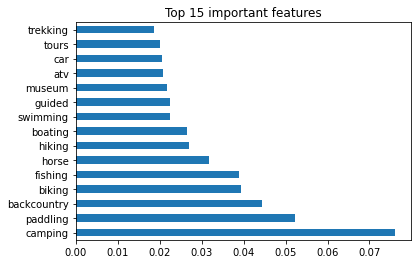

In [11]:
feat_importances = pd.Series(rf.feature_importances_, index=a_list)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()